In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("car_prediction_data.csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Data Analysis

## Selling Prices Per Year

C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


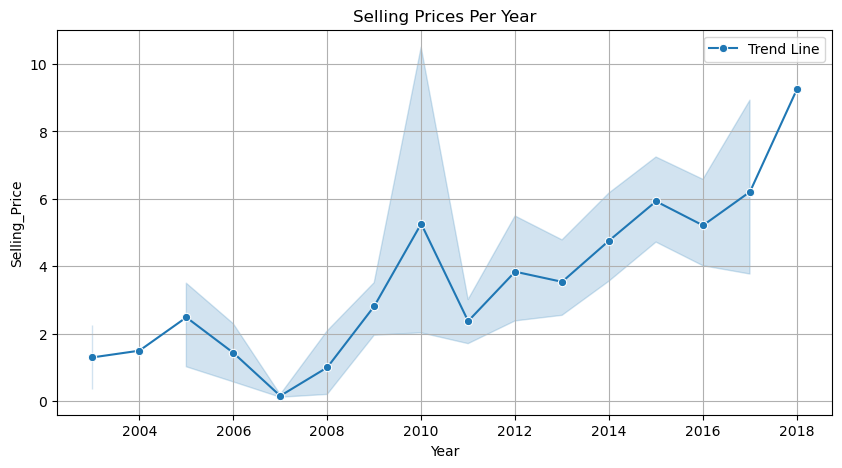

In [9]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="Year", y="Selling_Price", marker="o", label="Trend Line")
plt.xlabel("Year")
plt.ylabel("Selling_Price")
plt.title("Selling Prices Per Year")
plt.grid(True)
plt.show()

Data has effected by business cycles between 2004 to 2018

Business Cycles: Business cycles are a type of fluctuation found in the aggregate economic activity of a nation—a cycle that consists of expansions occurring at about the same time in many economic activities, followed by similarly general contractions. This sequence of changes is recurrent but not periodic.

## Object to Numeric Data

In [11]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<Axes: >

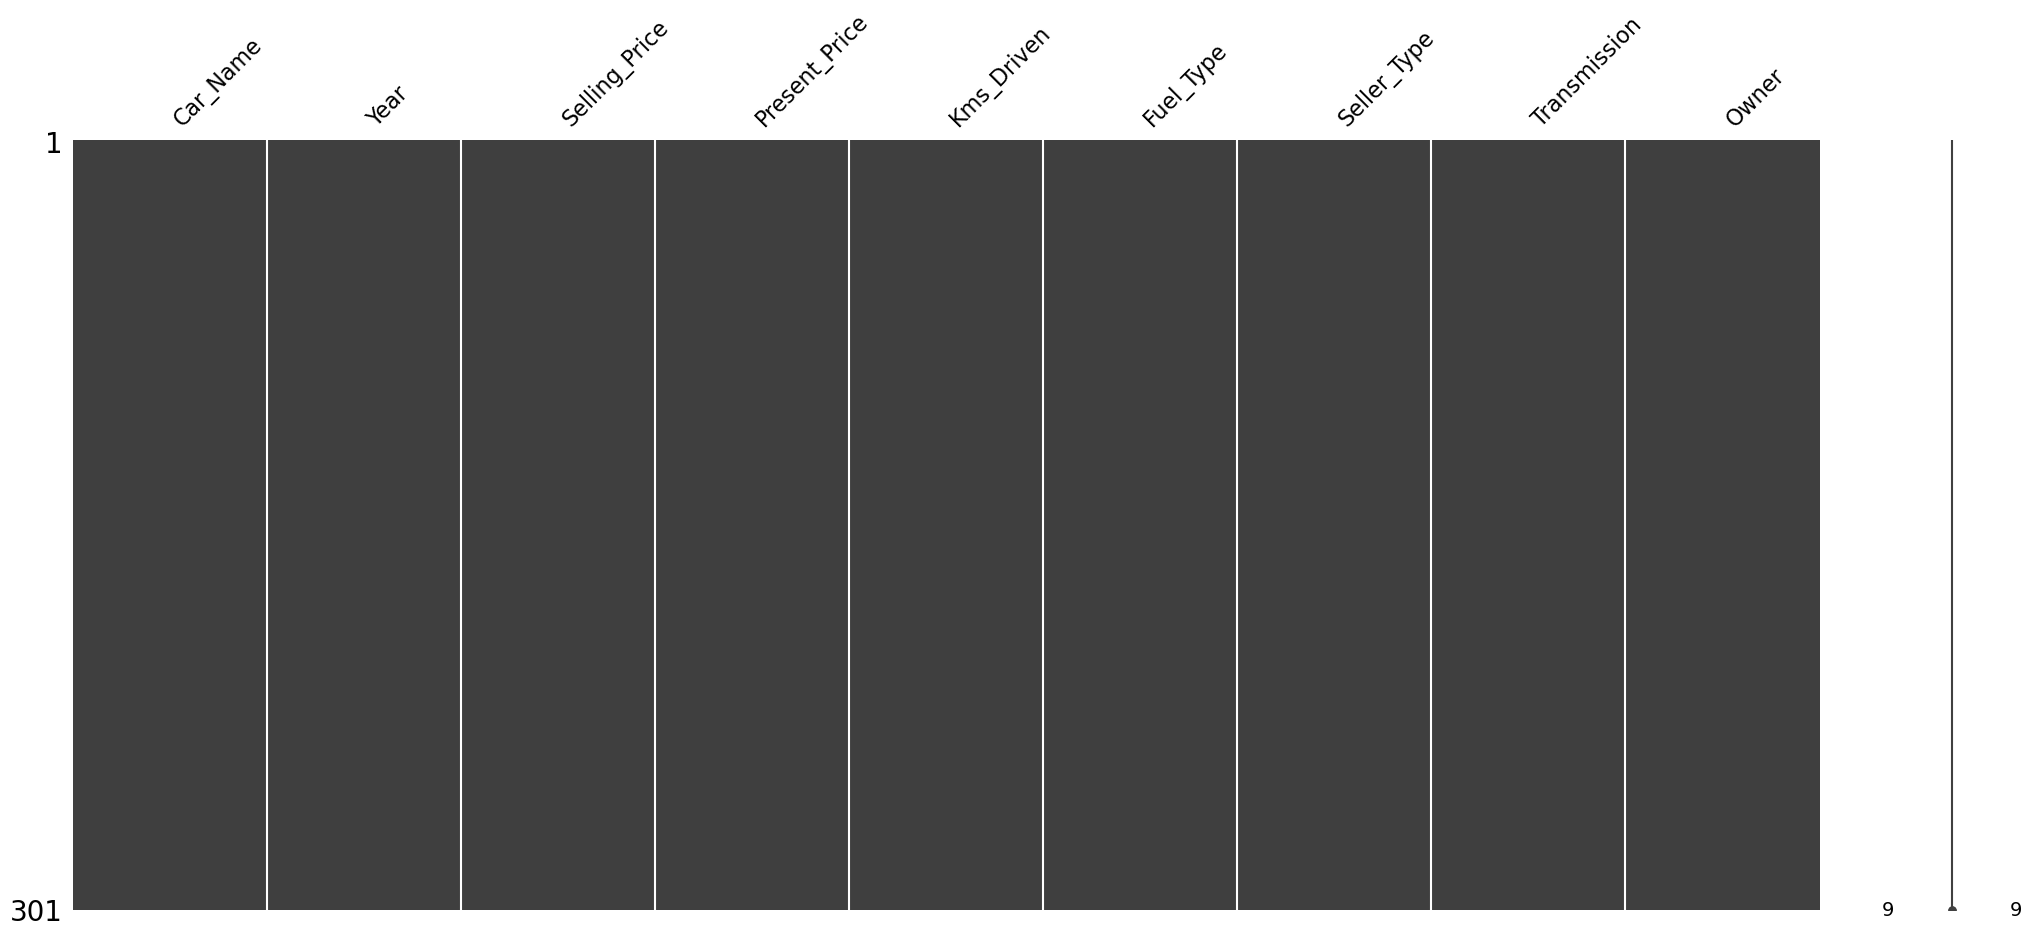

In [12]:
import missingno as ms
ms.matrix(df)

In [21]:
final_df=df.drop(columns=["Car_Name"], axis=1)
final_df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [23]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
str_data=final_df.select_dtypes(include=["object"])
int_data=final_df.select_dtypes(include=["float", "integer"])
features=str_data.apply(label.fit_transform)
features=features.join(int_data)
features.head()

,Fuel_Type,Seller_Type,Transmission,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2,0,1,2014,3.35,5.59,27000,0
1,1,0,1,2013,4.75,9.54,43000,0
2,2,0,1,2017,7.25,9.85,6900,0
3,2,0,1,2011,2.85,4.15,5200,0
4,1,0,1,2014,4.60,6.87,42450,0


We've successfully transformed our string (object) data to integer. We don't need car name's while evaluating our model.

In [30]:
features["Current_Year"]=2024
features.head()

,Fuel_Type,Seller_Type,Transmission,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year
0,2,0,1,2014,3.35,5.59,27000,0,2024
1,1,0,1,2013,4.75,9.54,43000,0,2024
2,2,0,1,2017,7.25,9.85,6900,0,2024
3,2,0,1,2011,2.85,4.15,5200,0,2024
4,1,0,1,2014,4.60,6.87,42450,0,2024


In [31]:
features["No_Year"]=features["Current_Year"]-features["Year"]
features.head()

,Fuel_Type,Seller_Type,Transmission,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,No_Year
0,2,0,1,2014,3.35,5.59,27000,0,2024,10
1,1,0,1,2013,4.75,9.54,43000,0,2024,11
2,2,0,1,2017,7.25,9.85,6900,0,2024,7
3,2,0,1,2011,2.85,4.15,5200,0,2024,13
4,1,0,1,2014,4.60,6.87,42450,0,2024,10


In [32]:
features.drop(["Year"], axis=1, inplace=True)
features.head()

,Fuel_Type,Seller_Type,Transmission,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,No_Year
0,2,0,1,3.35,5.59,27000,0,2024,10
1,1,0,1,4.75,9.54,43000,0,2024,11
2,2,0,1,7.25,9.85,6900,0,2024,7
3,2,0,1,2.85,4.15,5200,0,2024,13
4,1,0,1,4.60,6.87,42450,0,2024,10


In [34]:
print(features["Fuel_Type"].unique())

[2 1 0]


In [35]:
features.corr()

,Fuel_Type,Seller_Type,Transmission,Selling_Price,Present_Price,Kms_Driven,Owner,Current_Year,No_Year
Fuel_Type,1.000000,0.352415,0.080466,-0.509467,-0.440415,-0.166801,0.055705,NaN,0.053643
Seller_Type,0.352415,1.000000,0.063240,-0.550724,-0.512030,-0.101419,0.124269,NaN,0.039896
Transmission,0.080466,0.063240,1.000000,-0.367128,-0.348715,-0.162510,-0.050316,NaN,-0.000394
Selling_Price,-0.509467,-0.550724,-0.367128,1.000000,0.878983,0.029187,-0.088344,NaN,-0.236141
Present_Price,-0.440415,-0.512030,-0.348715,0.878983,1.000000,0.203647,0.008057,NaN,0.047584
Kms_Driven,-0.166801,-0.101419,-0.162510,0.029187,0.203647,1.000000,0.089216,NaN,0.524342
Owner,0.055705,0.124269,-0.050316,-0.088344,0.008057,0.089216,1.000000,NaN,0.182104
Current_Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
No_Year,0.053643,0.039896,-0.000394,-0.236141,0.047584,0.524342,0.182104,NaN,1.000000


C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

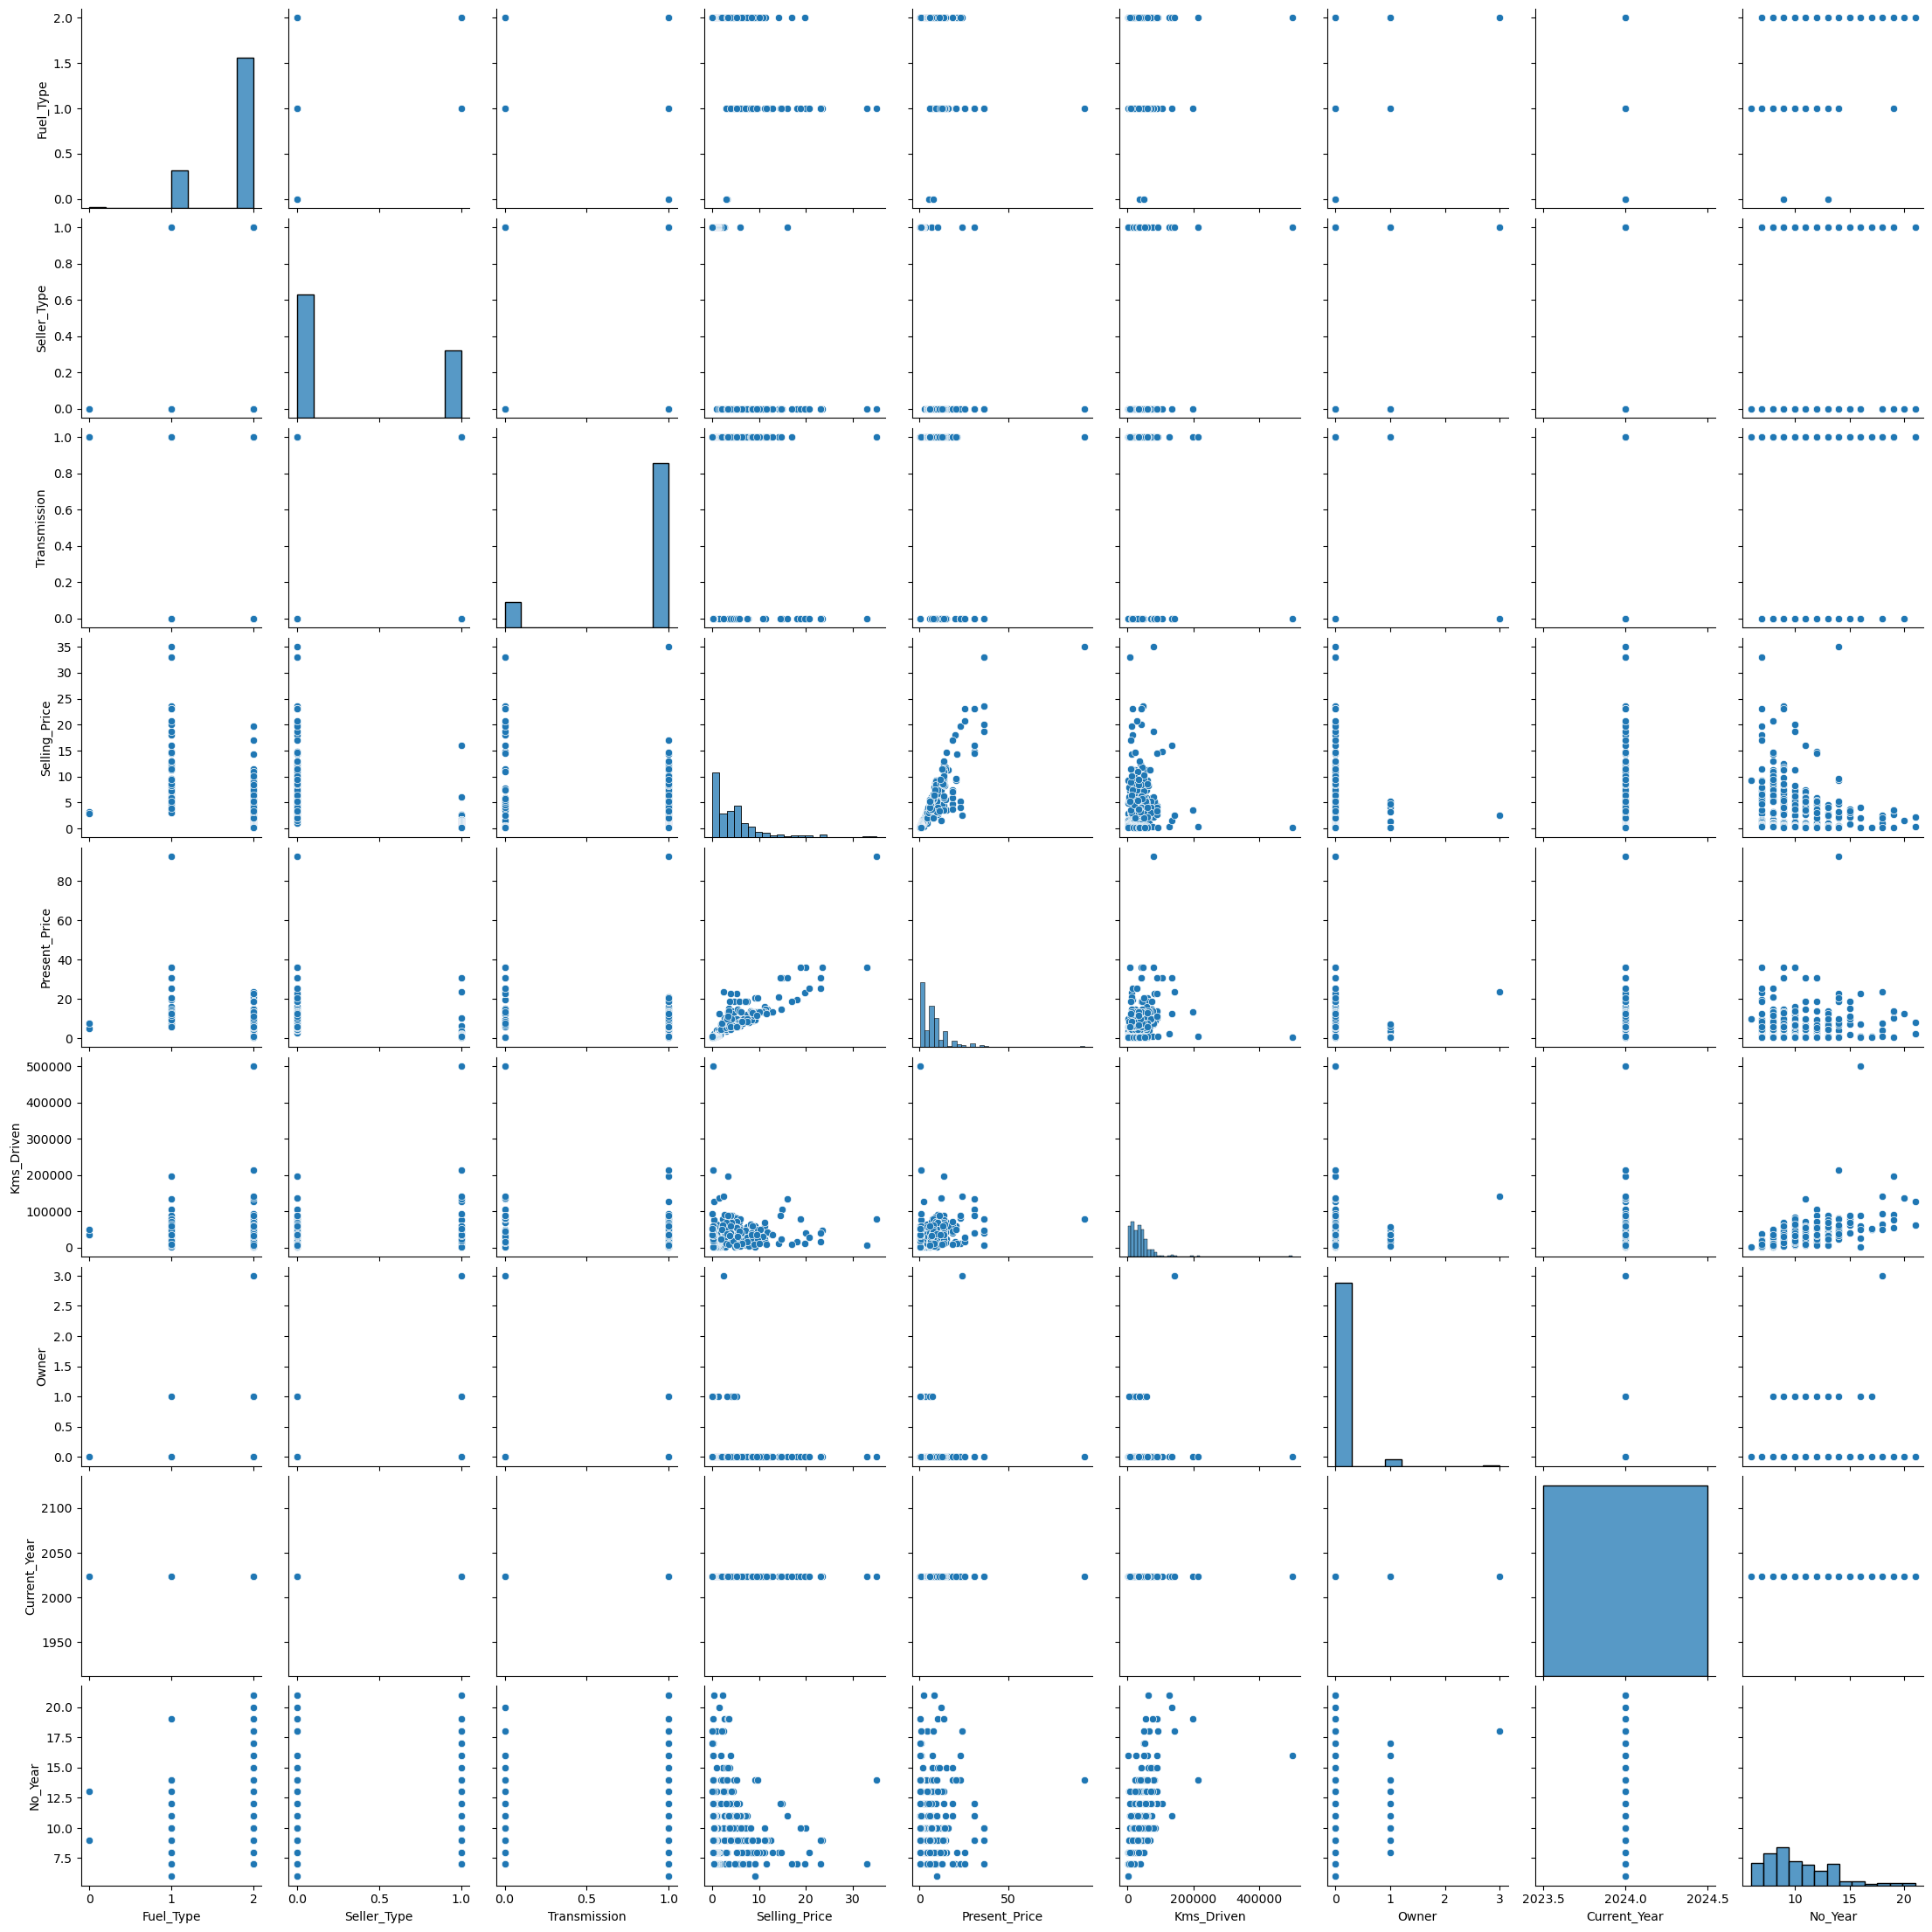

In [36]:
sns.pairplot(features)

In [37]:
X=features.drop("Selling_Price", axis=1)
X

,Fuel_Type,Seller_Type,Transmission,Present_Price,Kms_Driven,Owner,Current_Year,No_Year
0,2,0,1,5.59,27000,0,2024,10
1,1,0,1,9.54,43000,0,2024,11
2,2,0,1,9.85,6900,0,2024,7
3,2,0,1,4.15,5200,0,2024,13
4,1,0,1,6.87,42450,0,2024,10
...,...,...,...,...,...,...,...,...
296,1,0,1,11.60,33988,0,2024,8
297,2,0,1,5.90,60000,0,2024,9
298,2,0,1,11.00,87934,0,2024,15
299,1,0,1,12.50,9000,0,2024,7


In [38]:
y=features["Selling_Price"]
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

# Creating Model

## Feature Importance

In [39]:
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [40]:
print(model.feature_importances_)

[1.52205643e-01 2.37769094e-01 9.19536259e-02 4.03333338e-01
 3.95996424e-02 2.95692892e-04 0.00000000e+00 7.48429637e-02]


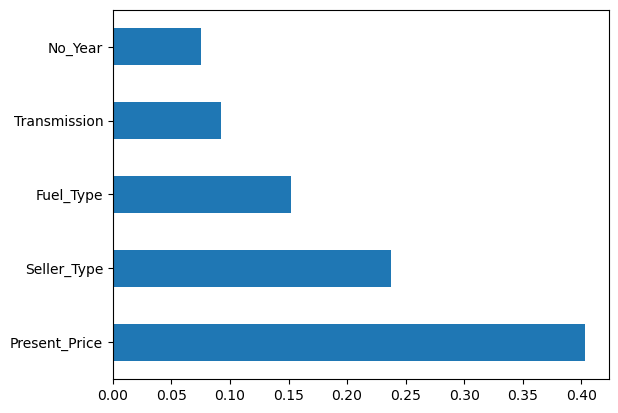

In [41]:
feat_importances=pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind="barh")
plt.show()

## Models

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [43]:
from sklearn.ensemble import RandomForestRegressor
RFR=RandomForestRegressor()

In [45]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features=["auto", "sqrt"]
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,10,15,100]
min_samples_leaf=[1,2,5,10]

In [46]:
random_grid={
    "n_estimators":n_estimators,
    "max_depth":max_depth,
    "max_features":max_features,
    "min_samples_leaf":min_samples_leaf,
    "min_samples_split":min_samples_split
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_depth': [5, 10, 15, 20, 25, 30], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 5, 10], 'min_samples_split': [2, 5, 10, 15, 100]}


In [47]:
RFR=RandomizedSearchCV(estimator=RFR, param_distributions=random_grid, scoring="neg_mean_squared_error",n_iter=10,cv=5,verbose=2,random_state=42)

In [48]:
RFR.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   0.2s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   0.3s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.5s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.5s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.6s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.5s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   0.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   0.8s
[CV] END max_depth=5, max_feat

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.6s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.6s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.6s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.6s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   0.6s


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
RFR.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [50]:
RFR.best_score_

-3.993403466680783

In [51]:
predictions=RFR.predict(X_test)

C:\Users\USER\AppData\Local\Temp\ipykernel_9372\2131792714.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Selling_Price', ylabel='Density'>

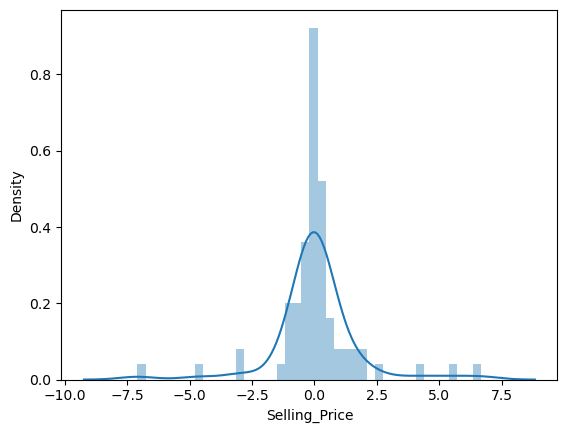

In [52]:
sns.distplot(y_test-predictions)

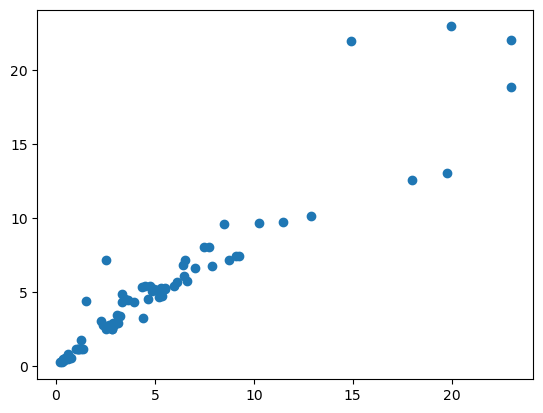

In [53]:
plt.scatter(y_test, predictions)

In [54]:
from sklearn import metrics

In [57]:
print("MAE:",metrics.mean_absolute_error(y_test,predictions))
print("MSE:",metrics.mean_squared_error(y_test,predictions))
print("RMSE:",np.sqrt(metrics.mean_absolute_error(y_test,predictions)))

MAE: 0.8884044653092437
MSE: 2.8509536931655832
RMSE: 0.9425521021722054


In [61]:
import xgboost as xgb
from scipy.stats import uniform, randint
xgb_model=xgb.XGBRegressor(objective="reg:linear", random_state=42)

In [62]:
params={
    "gama":uniform(0,0.5),
    "learning_rate": uniform(0.03, 0.3),
    "max_depth": randint(2,6),
    "n_estimators": randint(100,150),
    "subsample": uniform(0.6,0.4)
}

In [65]:
xgb=RandomizedSearchCV(estimator=xgb_model,param_distributions=params,scoring="neg_mean_squared_error",n_iter=10, cv=5, verbose=2, random_state=42)

In [68]:
xgb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END gama=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gama=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gama=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gama=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gama=0.18727005942368125, learning_rate=0.3152142919229748, max_depth=4, n_estimators=107, subsample=0.8394633936788146; total time=   0.0s
[CV] END gama=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "gama" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\US

[CV] END gama=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gama=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gama=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gama=0.07800932022121826, learning_rate=0.07679835610086079, max_depth=4, n_estimators=110, subsample=0.9464704583099741; total time=   0.0s
[CV] END gama=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299; total time=   0.0s
[CV] END gama=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299; total time=   0.0s
[CV] END gama=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, su

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "gama" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\US

[CV] END gama=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299; total time=   0.0s
[CV] END gama=0.3005575058716044, learning_rate=0.24242177333881365, max_depth=3, n_estimators=101, subsample=0.8887995089067299; total time=   0.0s
[CV] END gama=0.4692763545078751, learning_rate=0.030233629752304297, max_depth=5, n_estimators=120, subsample=0.8469926038510867; total time=   0.0s
[CV] END gama=0.4692763545078751, learning_rate=0.030233629752304297, max_depth=5, n_estimators=120, subsample=0.8469926038510867; total time=   0.0s
[CV] END gama=0.4692763545078751, learning_rate=0.030233629752304297, max_depth=5, n_estimators=120, subsample=0.8469926038510867; total time=   0.0s
[CV] END gama=0.4692763545078751, learning_rate=0.030233629752304297, max_depth=5, n_estimators=120, subsample=0.8469926038510867; total time=   0.0s


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "gama" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\US

[CV] END gama=0.4692763545078751, learning_rate=0.030233629752304297, max_depth=5, n_estimators=120, subsample=0.8469926038510867; total time=   0.0s
[CV] END gama=0.30582658024414044, learning_rate=0.03211989156591522, max_depth=2, n_estimators=148, subsample=0.8099098641033556; total time=   0.0s
[CV] END gama=0.30582658024414044, learning_rate=0.03211989156591522, max_depth=2, n_estimators=148, subsample=0.8099098641033556; total time=   0.0s
[CV] END gama=0.30582658024414044, learning_rate=0.03211989156591522, max_depth=2, n_estimators=148, subsample=0.8099098641033556; total time=   0.0s
[CV] END gama=0.30582658024414044, learning_rate=0.03211989156591522, max_depth=2, n_estimators=148, subsample=0.8099098641033556; total time=   0.0s
[CV] END gama=0.30582658024414044, learning_rate=0.03211989156591522, max_depth=2, n_estimators=148, subsample=0.8099098641033556; total time=   0.0s


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "gama" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\US

[CV] END gama=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216; total time=   0.0s
[CV] END gama=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216; total time=   0.0s
[CV] END gama=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216; total time=   0.0s
[CV] END gama=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216; total time=   0.0s


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "gama" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\US

[CV] END gama=0.19993048585762774, learning_rate=0.04399969896408463, max_depth=5, n_estimators=115, subsample=0.6931085361721216; total time=   0.0s
[CV] END gama=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282; total time=   0.0s
[CV] END gama=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282; total time=   0.0s
[CV] END gama=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282; total time=   0.0s
[CV] END gama=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282; total time=   0.0s


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "gama" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\US

[CV] END gama=0.0453032172664104, learning_rate=0.2155158027999262, max_depth=5, n_estimators=102, subsample=0.9439761626945282; total time=   0.0s
[CV] END gama=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411; total time=   0.0s
[CV] END gama=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411; total time=   0.0s
[CV] END gama=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411; total time=   0.0s
[CV] END gama=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411; total time=   0.0s
[CV] END gama=0.34015376929388985, learning_rate=0.16514977559086289, max_depth=3, n_estimators=103, subsample=0.9768807022739411; total time=   0.0s
[CV] END gama=0.28164410892276964, learning_rate=0.14562495076197482, max_depth=3, n_estimators=101, s

C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "gama" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\US

[CV] END gama=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsample=0.6137554084460873; total time=   0.0s
[CV] END gama=0.22007624686980065, learning_rate=0.06661147045343364, max_depth=2, n_estimators=107, subsample=0.6137554084460873; total time=   0.0s


C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "gama" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\USER\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:27:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
C:\Users\US

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000199B7867A10>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000199B794BB90>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x00000199B7907950>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000199B7949390>},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [69]:
xgb.best_score_

-2.8248026325046576

In [70]:
xgb.best_params_

{'gama': 0.07800932022121826,
 'learning_rate': 0.07679835610086079,
 'max_depth': 4,
 'n_estimators': 110,
 'subsample': 0.9464704583099741}

In [75]:
xgb_predictions=xgb.predict(X_test)

C:\Users\USER\AppData\Local\Temp\ipykernel_9372\2033882851.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-xgb_predictions)
C:\Users\USER\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Selling_Price', ylabel='Density'>

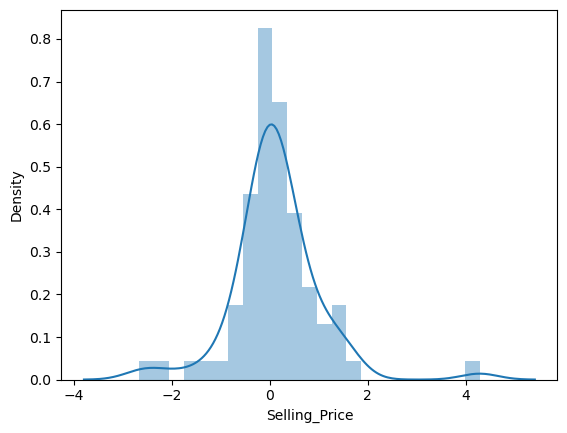

In [76]:
sns.distplot(y_test-xgb_predictions)

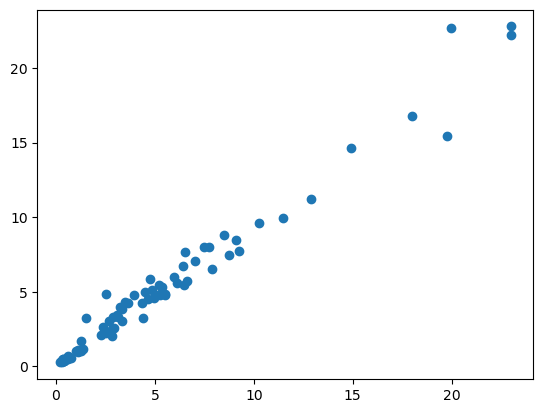

In [77]:
plt.scatter(y_test,xgb_predictions)

In [79]:
print("MAE:", metrics.mean_absolute_error(y_test, xgb_predictions))
print("MSE:", metrics.mean_squared_error(y_test, xgb_predictions))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, xgb_predictions)))

MAE: 0.5686414177323643
MSE: 0.8044431351584582
RMSE: 0.89690753991616


# Summary

MAE: MAE represents the average absolute difference between the predicted and actual values. (Lower is better)
MSE: MSE calculates the average squared error, meaning larger errors are penalized more than smaller ones.
RMSE: RMSE is simply the square root of MSE, bringing the error back to the original scale of the data.

According to this informations XGBoost is a better option because random forest has way bigger MSE value than XGBoost.